# Жазылымдық сервис жағдайында клиенттердің кетуін болжау                  

Клиенттердің жазылымдық сервистегі мінез-құлқын зерттеу, олардың әрекеттерін талдау және клиенттердің кету ықтималдығын болжауға арналған модель құру. Бұл зерттеу компанияларға клиенттердің кету себептерін түсініп, олардың адалдығын арттыру үшін тиімді стратегияларды әзірлеуге көмектеседі.

Клиенттердің кетуі (Customer churn) – бұл клиенттердің компаниямен немесе қызмет көрсетушімен қарым-қатынасын тоқтату құбылысы. Ол белгілі бір кезең ішінде өнімдер мен қызметтерді пайдалануды тоқтатқан клиенттердің пайызын көрсетеді.

Churn деректер жинағында "churn" белгісі клиенттің кету-кетпеуін көрсетеді:

Кеткен клиент – жазылымды немесе қызметті тоқтатқан. Қалған клиент – компаниямен қарым-қатынасын жалғастырған. Клиенттердің кетуін талдау маңызды, себебі ол кіріске, өсуге және клиенттерді ұстап қалуға әсер етеді. Бұл үрдісті түсіну арқылы компаниялар:

Кетудің себептерін анықтай алады, Клиенттерді ұстап қалу стратегияларын әзірлейді, Клиенттердің ризашылығын арттырады, Машиналық оқыту арқылы кетуді болжауға мүмкіндік алады. Бұл тәсілдер бизнесті дамытуға және кірісті арттыруға көмектеседі.

# Деректерді жүктеу

In [15]:
import pandas as pd

file_path = r"C:\Users\PC\Downloads\data_table.csv"

data = pd.read_csv(file_path)

print(data.info())

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         58305 non-null  float64
 1   Age                58373 non-null  float64
 2   Gender             58355 non-null  object 
 3   Tenure             58117 non-null  float64
 4   Usage Frequency    58297 non-null  float64
 5   Support Calls      58219 non-null  float64
 6   Payment Delay      58227 non-null  float64
 7   Subscription Type  58208 non-null  object 
 8   Contract Length    58264 non-null  object 
 9   Total Spend        58116 non-null  float64
 10  Last Interaction   58323 non-null  float64
 11  Churn              58209 non-null  float64
dtypes: float64(9), object(3)
memory usage: 5.9+ MB
None


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,NaN,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,NaN,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,NaN
3,4.0,35.0,Male,9.0,12.0,NaN,NaN,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


# Деректерді өңдеу

In [16]:
mode_value = data['Churn'].mode()[0]

# Бос мәндерді модасымен толтыру
data['Churn'].fillna(mode_value, inplace=True)

data.fillna(data.mean(numeric_only=True), inplace=True)
#сандық(бос) мәндерді қатардың орташа мәнімен толтыру

for col in data.select_dtypes(include=['object']):
    data[col].fillna(data[col].mode()[0], inplace=True)
#категориялық(бос) мәндерді қатардың модасымен толтыру

In [17]:
print(data.isnull().sum())
#деректердегі бос мәндер жойылғанын тексеру

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [18]:
print(data['Churn'].unique()) 

[1. 0.]


In [4]:
data['CustomerID'] = data['CustomerID'].astype(str)
#қатарды жолдық типке түрлендіру

data['Last Interaction'] = pd.to_datetime(data['Last Interaction'], errors='coerce')
#қатарды уақыт форматына ауыстыру

# 'Gender' бағанын түрлендіру
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# 'Subscription Type' бағанын түрлендіру
data['Subscription Type'] = data['Subscription Type'].map({'Basic': 1, 'Standard': 2, 'Premium': 3})
mapping = {'Monthly': 1, 'Quarterly': 3, 'Annual': 12}
data['Contract Length'] = data['Contract Length'].map(mapping)

print(data.dtypes)
#деректер түрін тексереміз


CustomerID                   object
Age                         float64
Gender                        int64
Tenure                      float64
Usage Frequency             float64
Support Calls               float64
Payment Delay               float64
Subscription Type             int64
Contract Length               int64
Total Spend                 float64
Last Interaction     datetime64[ns]
Churn                       float64
dtype: object


In [5]:
data.drop_duplicates(inplace=True)
#дубликаттарды өшіру

print(f"Количество дубликатов: {data.duplicated().sum()}")
#дубликаттардың бар жоғын тексереміз

Количество дубликатов: 0


# Бастапқы талдау

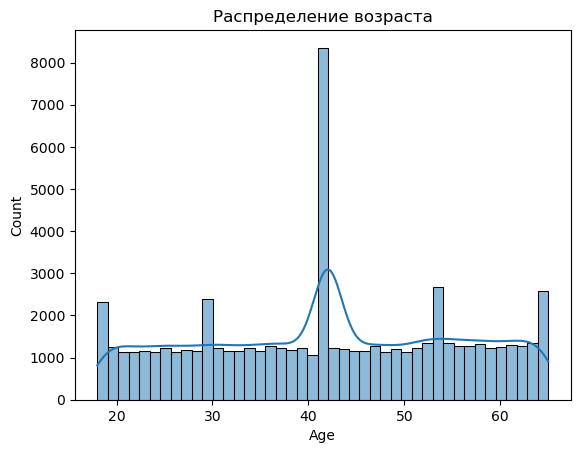

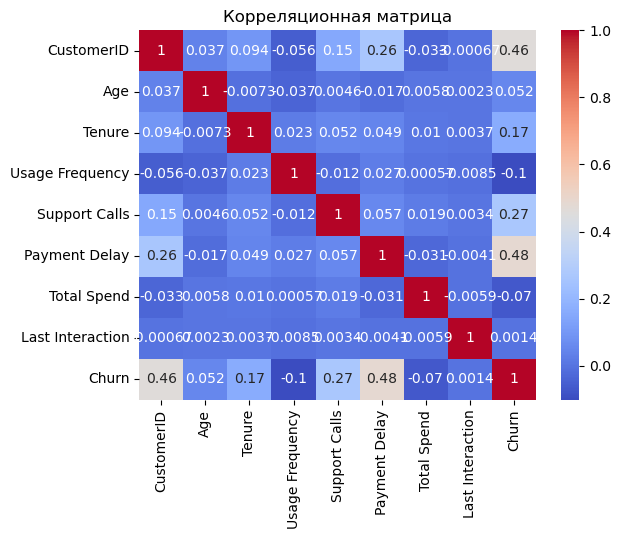

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data['Age'], kde=True)
plt.title("Распределение возраста")
plt.show()
#Жас қатарына гистограмма жасаймыз

correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()
#Корреляциялық матрица

#'Subscription Type' үшін диаграмма



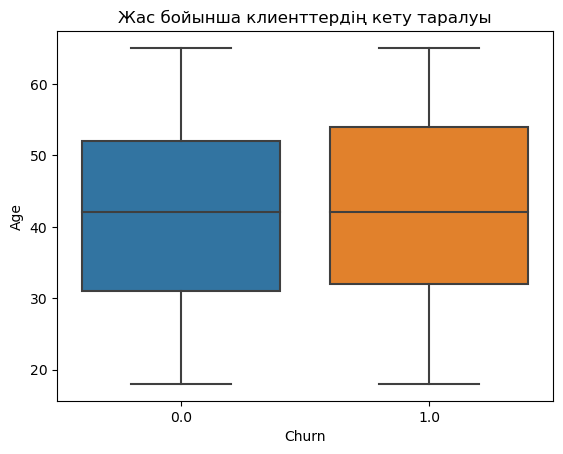

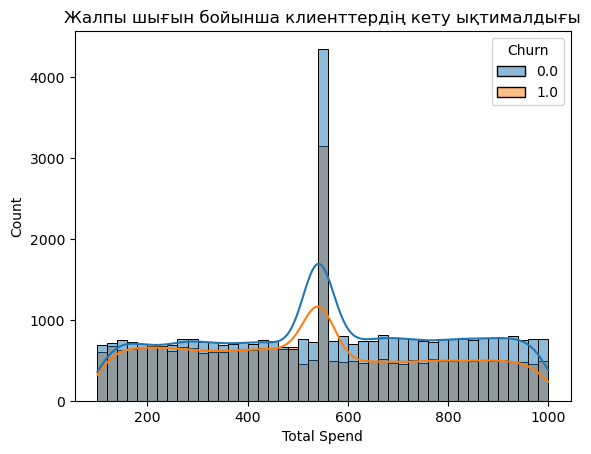

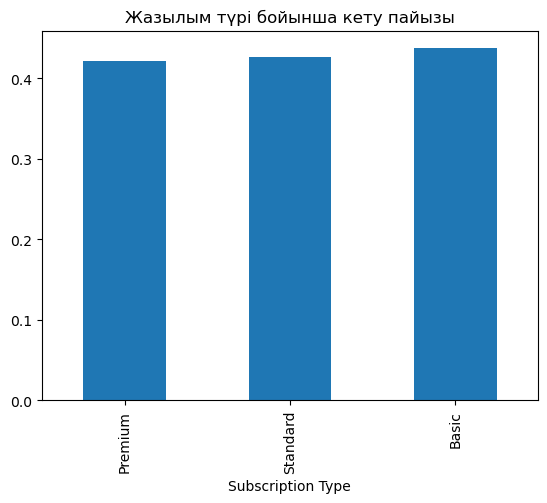

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age бойынша Churn таралуы
sns.boxplot(x='Churn', y='Age', data=data)
plt.title('Жас бойынша клиенттердің кету таралуы')
plt.show()

# Total Spend бойынша Churn таралуы
sns.histplot(data, x='Total Spend', hue='Churn', kde=True)
plt.title('Жалпы шығын бойынша клиенттердің кету ықтималдығы')
plt.show()

# Жазылым түрі бойынша Churn пайызы
data.groupby('Subscription Type')['Churn'].mean().sort_values().plot(kind='bar')
plt.title('Жазылым түрі бойынша кету пайызы')
plt.show()


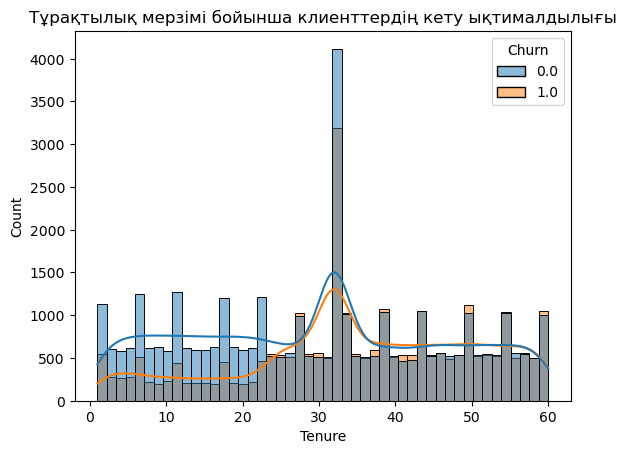

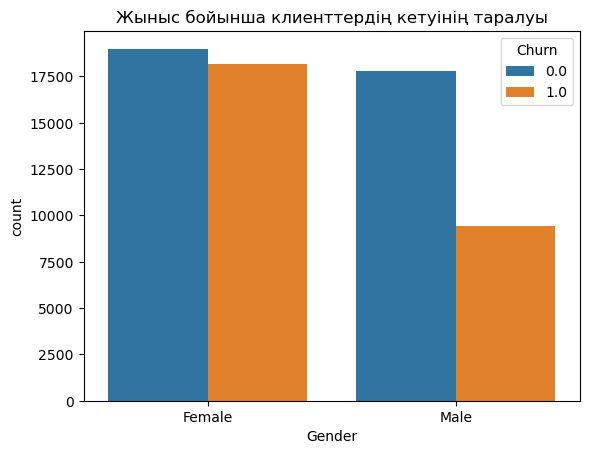

In [24]:
sns.histplot(data, x='Tenure', hue='Churn', kde=True)
plt.title('Тұрақтылық мерзімі бойынша клиенттердің кету ықтималдылығы')
plt.show()

sns.countplot(x='Gender', hue='Churn', data=data)
plt.title('Жыныс бойынша клиенттердің кетуінің таралуы')
plt.show()


In [25]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32202.179299,42.007795,31.999983,15.063005,5.396400,17.138012,541.214949,15.512148,0.428512
std,17670.047113,13.256679,16.240399,8.399953,2.961331,8.414861,247.717862,8.226853,0.494867
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,17816.250000,31.000000,20.000000,8.000000,3.000000,11.000000,337.000000,9.000000,0.000000
50%,32202.179299,42.007795,31.999983,15.063005,5.396400,17.138012,541.214949,15.512148,0.000000
75%,46604.750000,53.000000,45.000000,22.000000,8.000000,24.000000,743.000000,22.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


0.0    57.148849
1.0    42.851151
Name: Churn, dtype: float64


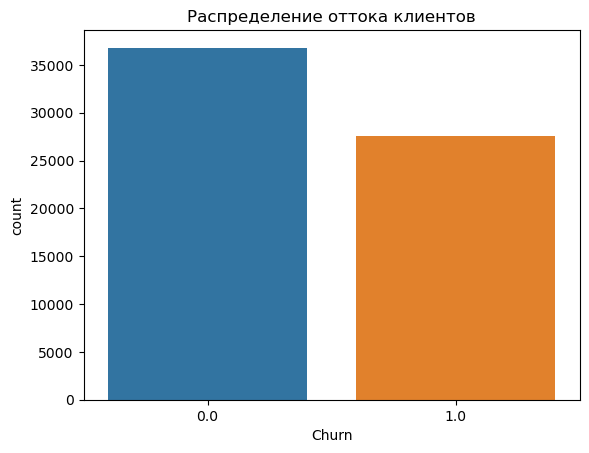

In [26]:
churn_rate = data['Churn'].value_counts(normalize=True) * 100
print(churn_rate)
sns.countplot(x='Churn', data=data)
plt.title("Распределение оттока клиентов")
plt.show()

# Клиенттердің кетуін болжау

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Тәуелсіз және тәуелді айнымалыларды анықтау
X = data[['Payment Delay', 'Support Calls', 'Tenure']]  # Тәуелсіз айнымалылар
y = data['Churn']  # Тәуелді айнымалы (бинарлы)

# Деректерді оқыту және тест жиынына бөлу
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логистикалық регрессия
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_predictions = log_model.predict(X_test)

print("Логистикалық регрессия нәтижелері:")
print(confusion_matrix(y_test, log_predictions))
print(classification_report(y_test, log_predictions))

# Шешімдер ағашы
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

print("Шешімдер ағашы нәтижелері:")
print(confusion_matrix(y_test, tree_predictions))
print(classification_report(y_test, tree_predictions))


Логистикалық регрессия нәтижелері:
[[5960 1315]
 [1485 4115]]
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      7275
         1.0       0.76      0.73      0.75      5600

    accuracy                           0.78     12875
   macro avg       0.78      0.78      0.78     12875
weighted avg       0.78      0.78      0.78     12875

Шешімдер ағашы нәтижелері:
[[6054 1221]
 [1714 3886]]
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80      7275
         1.0       0.76      0.69      0.73      5600

    accuracy                           0.77     12875
   macro avg       0.77      0.76      0.77     12875
weighted avg       0.77      0.77      0.77     12875



# Нәтижелер

1. Корреляция матрицасы:
Берілген корреляция матрицасына сәйкес клиенттердің кетуіне ең үлкен әсер ететін факторлар:

Payment Delay (төлемнің кешігуі): Корреляция мәні 0.48, бұл ең жоғары мән.
Support Calls (қолдау қоңыраулары): Корреляция мәні 0.27, яғни клиенттер қолдау көрсету орталығына жиі қоңырау шалған сайын кету ықтималдығы артады.
Tenure (қызметте болу мерзімі): Корреляция 0.17. Ұзақ мерзімге қызметте қалған клиенттерде кету ықтималдығы төмендеу.
Бұл корреляция мәндері факторлардың клиенттердің кету ықтималдығына әсерін көрсетеді.

2. Клиенттердің кетуінің үлесі:
Берілген деректер бойынша: 57.15% клиенттер қалған (0.0).
42.85% клиенттер кеткен (1.0).
Бұл шамамен әрбір 2 клиенттің 1-і қызметтен кетіп жатыр дегенді білдіреді. Сондықтан бұл мәселе бизнес үшін маңызды.

3. Логистикалық регрессия және шешімдер ағашы модельдерінің нәтижелері:
Логистикалық регрессия:
Дәлдігі (accuracy): 78%.
Precision (нақтылық):
0.0 үшін: 80%.
1.0 үшін: 76%.
Recall (толықтық):
0.0 үшін: 82%.
1.0 үшін: 73%.
Шешімдер ағашы:
Дәлдігі (accuracy): 77%.
Precision (нақтылық):
0.0 үшін: 78%.
1.0 үшін: 76%.
Recall (толықтық):
0.0 үшін: 83%.
1.0 үшін: 69%.

4. Модельдерді салыстыру:
Логистикалық регрессия моделі клиенттердің кетуін болжау үшін сәл жақсырақ, себебі оның:
Жалпы дәлдігі жоғары (78%).
1.0 класы үшін recall мәні жоғары (73%).
Шешімдер ағашы:
0.0 класы үшін recall жоғары (83%).
Бірақ 1.0 класы үшін recall төмен (69%).
Егер клиенттердің кету ықтималдығын (1.0) болжау маңызды болса, Логистикалық регрессия моделі тиімдірек.

5. Қорытынды:
Клиенттердің кету ықтималдығын болжау мүмкін: Жоғарыда аталған екі модель де шамамен 77−78% дәлдікпен жұмыс істейді. Бұл бизнеске шешім қабылдауда жеткілікті қолдау көрсетуге мүмкіндік береді.
Ең әсерлі факторлар: Төлемнің кешігуі, қолдау қоңырауларының саны және клиенттің компанияда болу мерзімі.
Клиенттерді сақтап қалу үшін төлемдер кешігуін азайту және қолдау көрсету сапасын жақсарту бойынша шаралар қабылдау қажет.